<h1>Imports</h1>

In [1]:
import sys
sys.path.append("../")
from modules import regression_modelling, data_processing
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import plotly.express as px
import plotly.graph_objs as go


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv("./data/diamonds.csv")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
df = df.drop(["Unnamed: 0"], axis = 1)
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<h1>Dataviz</h1>

<h2>Univariate analysis</h2>

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


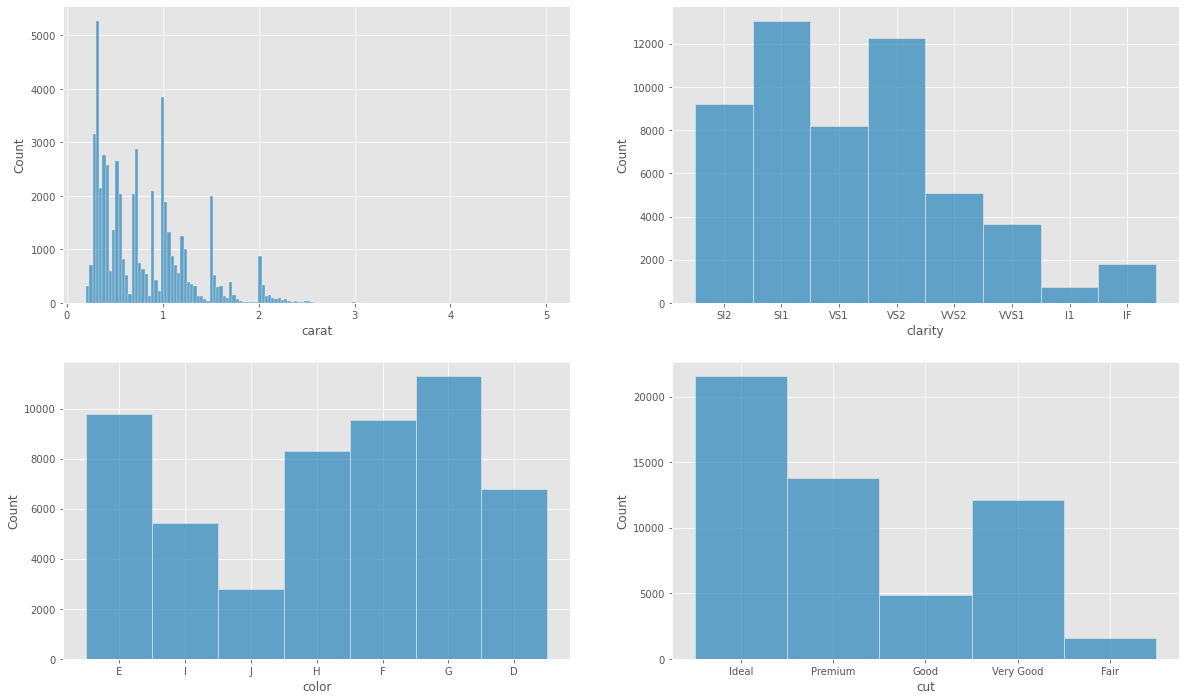

In [5]:
fig, ax = plt.subplots(2,2, figsize=(20,12))

sns.histplot(ax = ax[0, 0], data = df, x="carat")
sns.histplot(ax = ax[0, 1], data = df, x="clarity")
sns.histplot(ax = ax[1, 0], data = df, x="color")
sns.histplot(ax = ax[1, 1], data = df, x="cut")

plt.show()

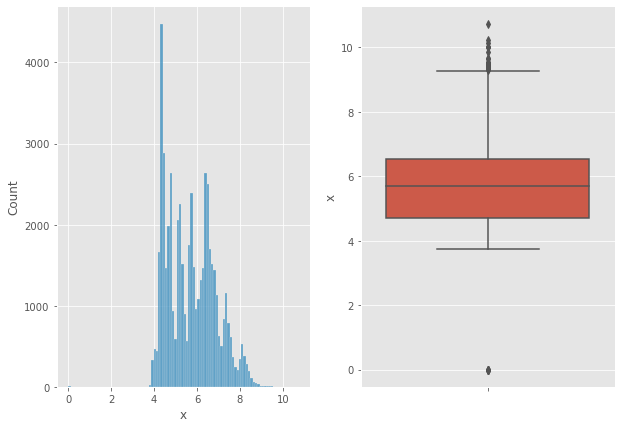

In [6]:
def plotxaxis():
    plt.figure(figsize = (10,7))
    plt.subplot(121)
    sns.histplot(x = "x" , data = df, bins = 100)
    plt.subplot(122)
    sns.boxplot(y = "x" , data = df)
    plt.show()
plotxaxis()

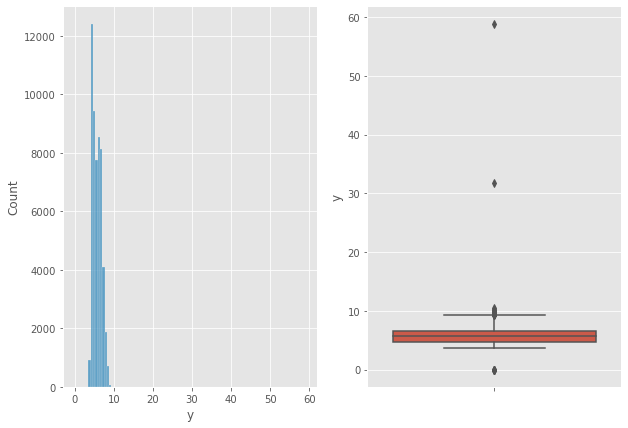

In [7]:
def plotyaxis():
    plt.figure(figsize = (10,7))
    plt.subplot(121)
    sns.histplot(x = "y" , data = df, bins = 100)
    plt.subplot(122)
    sns.boxplot(y = "y" , data = df)
    plt.show()
plotyaxis()

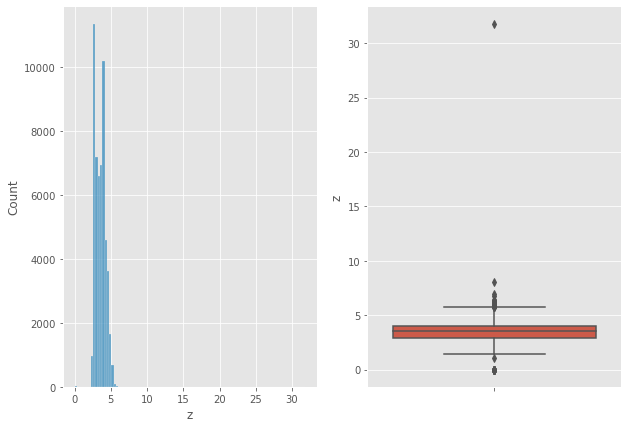

In [8]:
def plotzaxis():
    plt.figure(figsize = (10,7))
    plt.subplot(121)
    sns.histplot(x = "z" , data = df, bins = 100)
    plt.subplot(122)
    sns.boxplot(y = "z" , data = df)
    plt.show()
plotzaxis()

We can clearly see some outliers and zeros on x, y and z features of dataset, let's remove them first and them plot it again

In [9]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["z"]==0].index)
df = df.drop(df[df["y"]==0].index)

df = df[(df['z']<25)&(df['z']>2)]
df = df[(df['y']<30)]

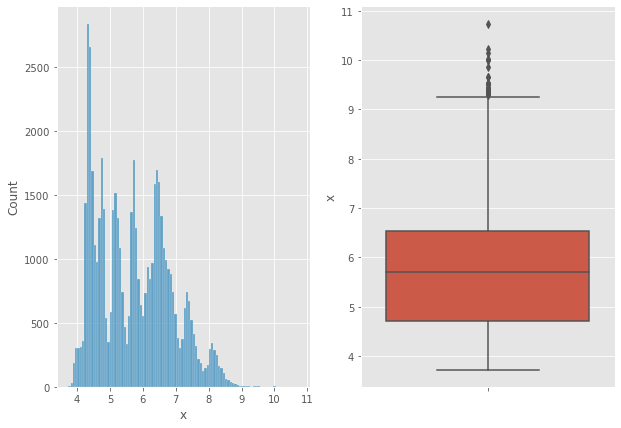

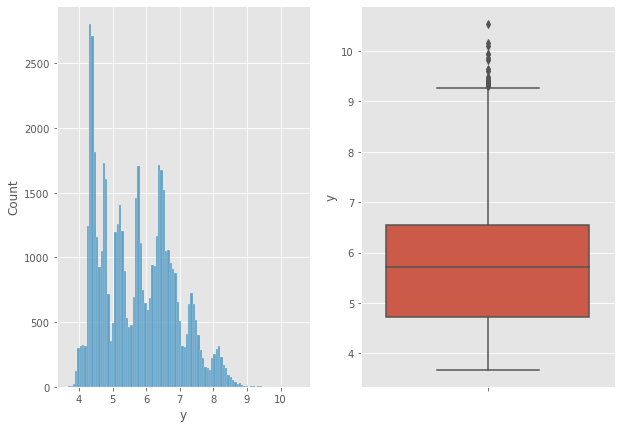

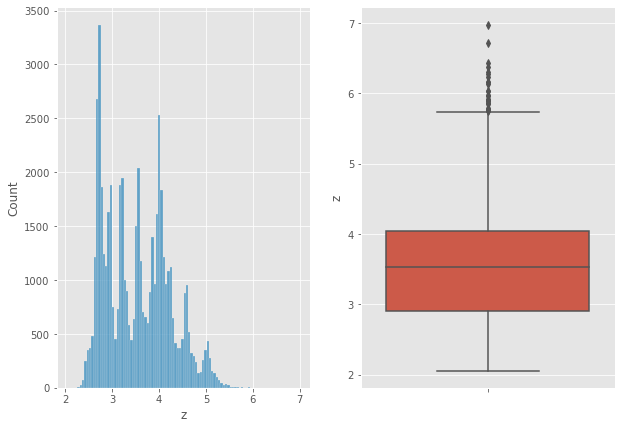

In [10]:
plotxaxis()
plotyaxis()
plotzaxis()

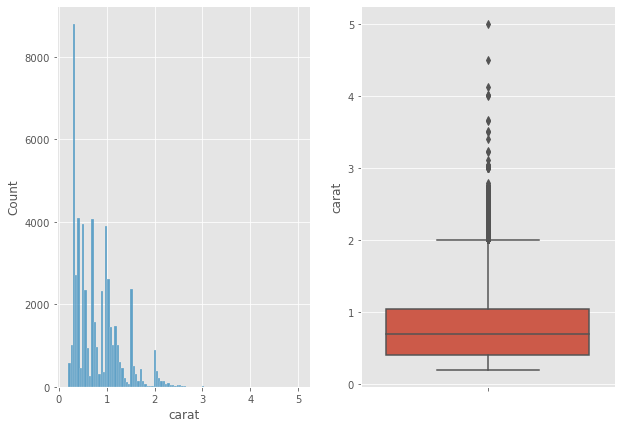

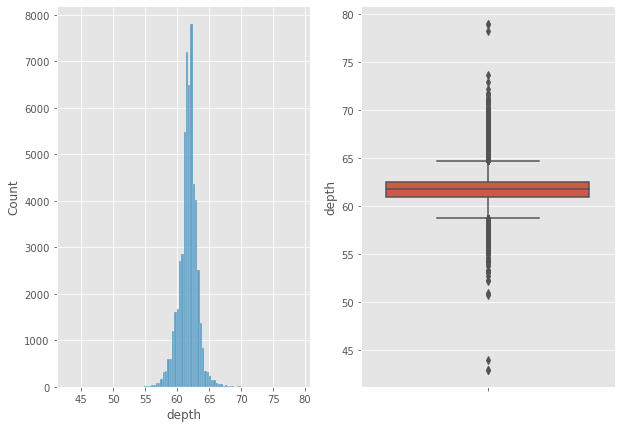

In [11]:
def plotcarat():
    plt.figure(figsize = (10,7))
    plt.subplot(121)
    sns.histplot(x = "carat" , data = df, bins = 100)
    plt.subplot(122)
    sns.boxplot(y = "carat" , data = df)
    plt.show()

def plotdepth():
    plt.figure(figsize = (10,7))
    plt.subplot(121)
    sns.histplot(x = "depth" , data = df, bins = 100)
    plt.subplot(122)
    sns.boxplot(y = "depth" , data = df)
    plt.show()

plotcarat()
plotdepth()

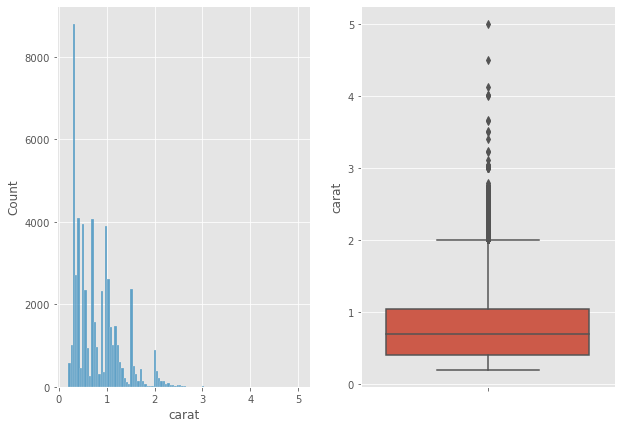

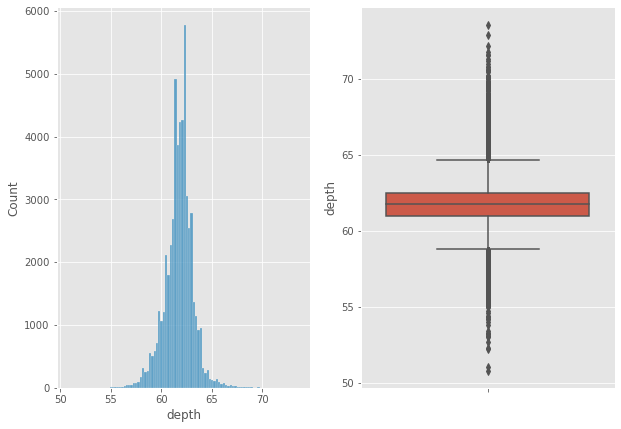

In [12]:
df = df[(df['depth']<75)&(df['depth']>45)]
df = df[(df['table']<85)]

plotcarat()
plotdepth()

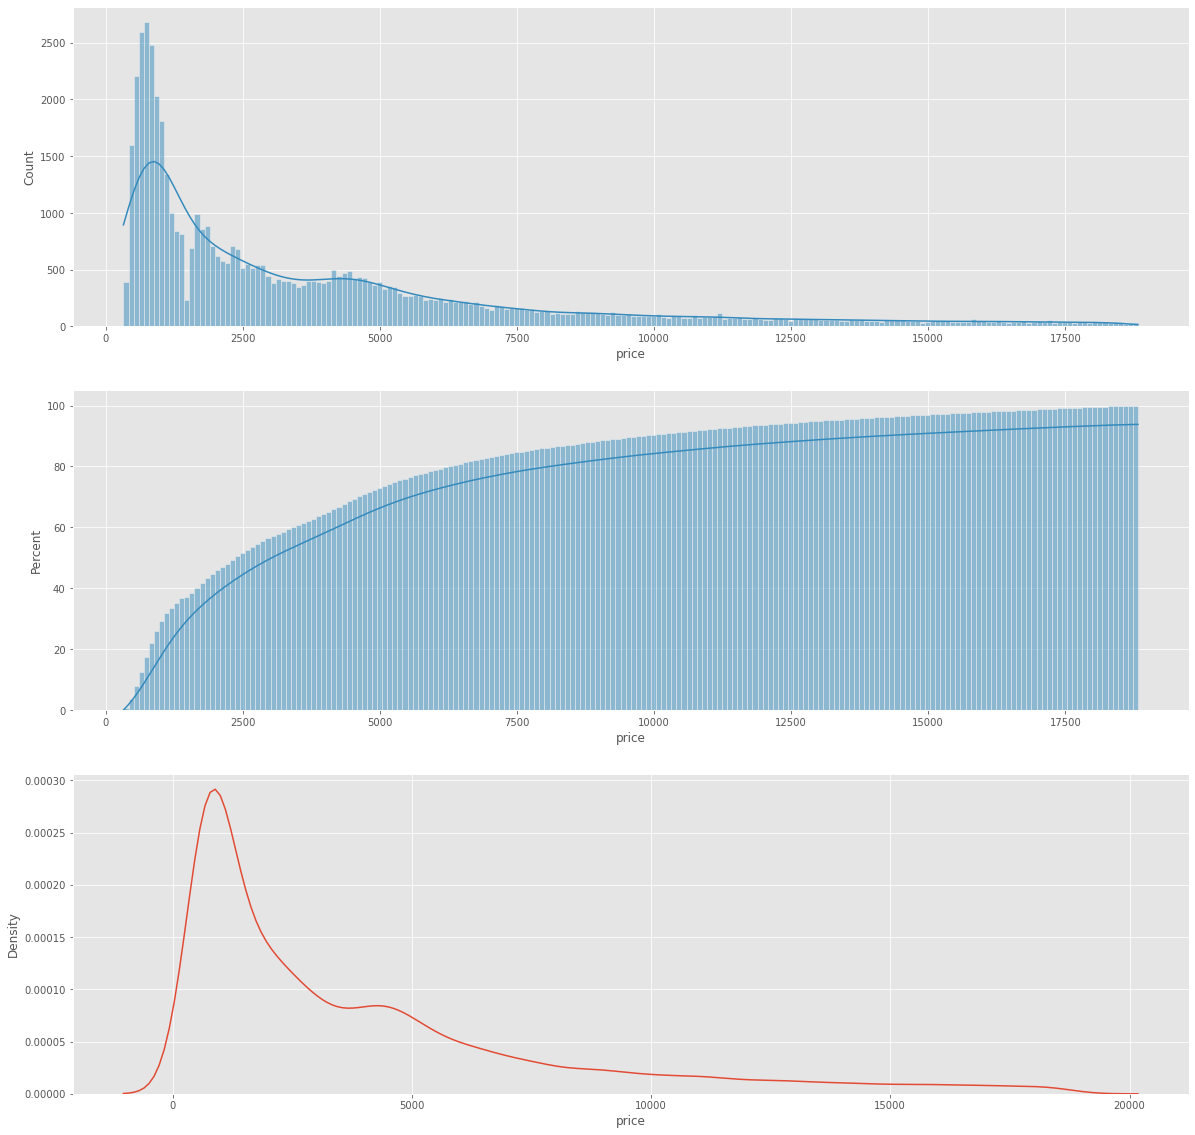

In [13]:
plt.figure(figsize=(20,20))
plt.subplot(3, 1, 1)
sns.histplot(data = df, x="price", kde=True, bins=200)
plt.subplot(3, 1, 2)
sns.histplot(data = df, x="price", kde=True, bins=200, cumulative=True, stat='percent')
plt.subplot(3, 1, 3)
sns.kdeplot(data = df, x = "price")
plt.show()

<h2>Multivariate analysis</h2>

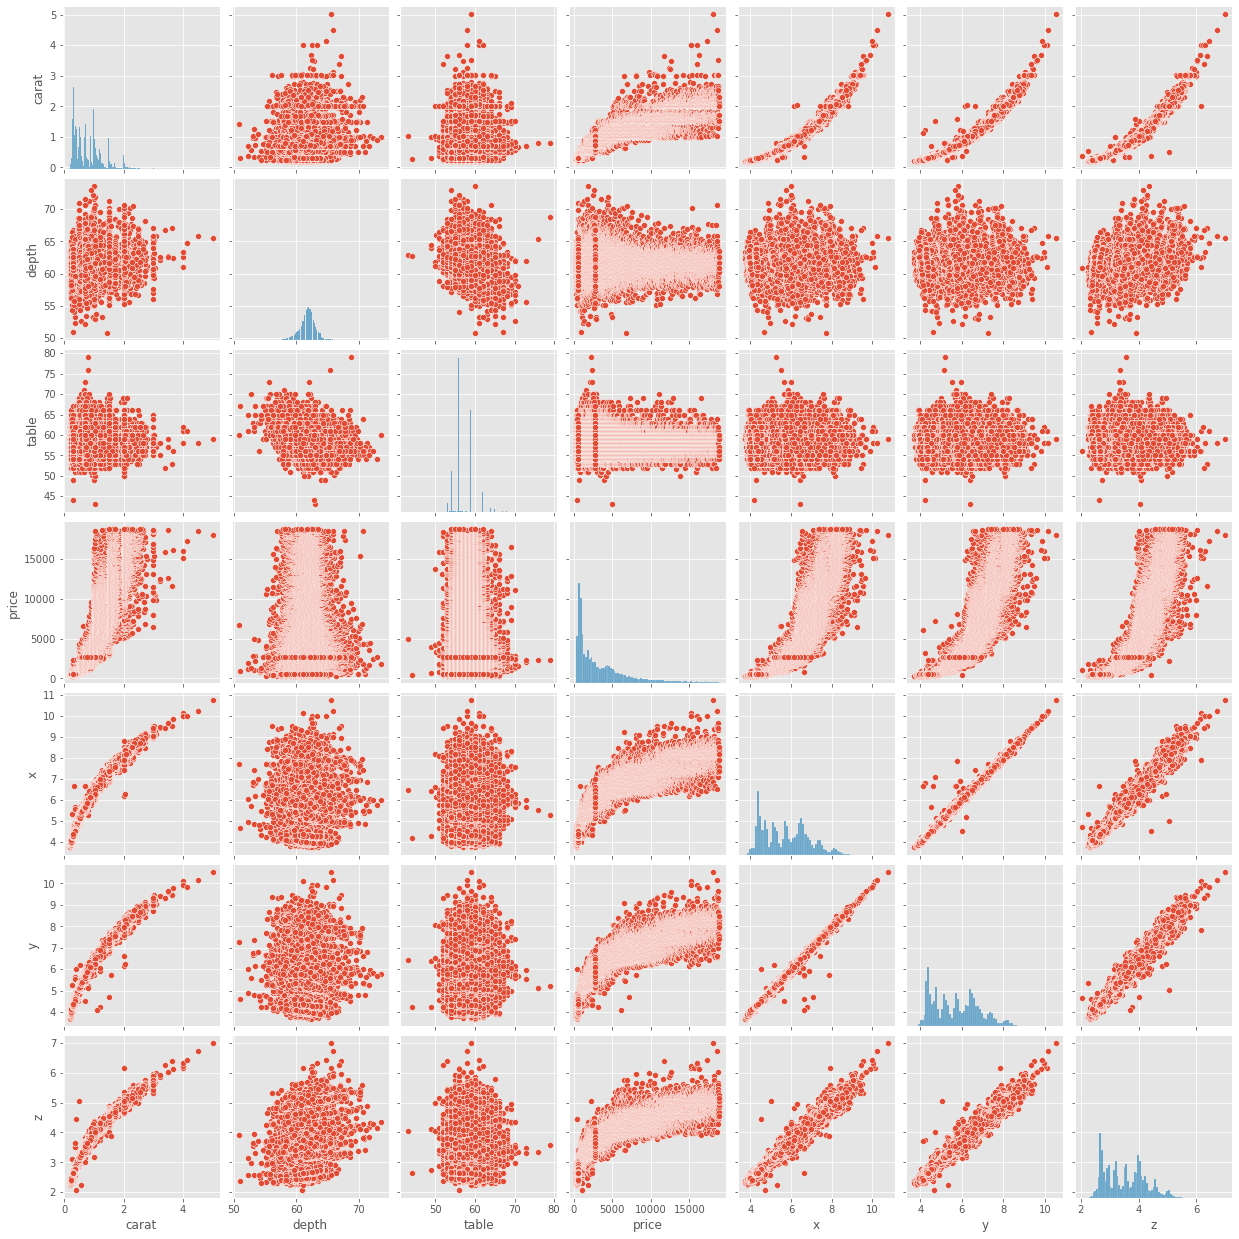

In [14]:
sns.pairplot(df)
plt.show()

In [15]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.029267,0.181797,0.921590,0.977777,0.976860,0.977037
depth,0.029267,1.000000,-0.302218,-0.010287,-0.024401,-0.027543,0.097525
table,0.181797,-0.302218,1.000000,0.127108,0.196327,0.190153,0.155670
price,0.921590,-0.010287,0.127108,1.000000,0.887212,0.888807,0.882634
x,0.977777,-0.024401,0.196327,0.887212,1.000000,0.998657,0.991665
y,0.976860,-0.027543,0.190153,0.888807,0.998657,1.000000,0.991327
z,0.977037,0.097525,0.155670,0.882634,0.991665,0.991327,1.000000


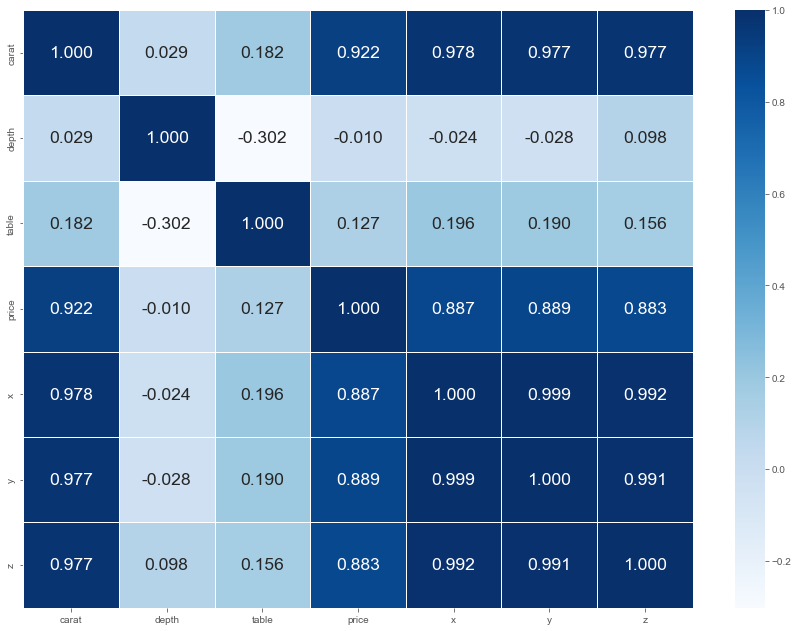

In [16]:
plt.figure(figsize=(15,11))
sns.heatmap(df.corr(), annot=True, fmt=".3f", linewidth=.8, annot_kws={"size": 17.5}, cmap="Blues")
sns.set(font_scale=1.9)
plt.show()

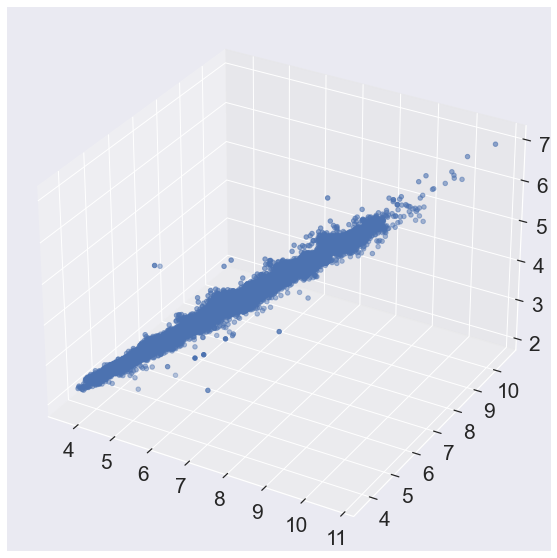

In [17]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

x=df['x']
y=df['y']
z=df['z']

ax.scatter(x, y, z)
plt.show()

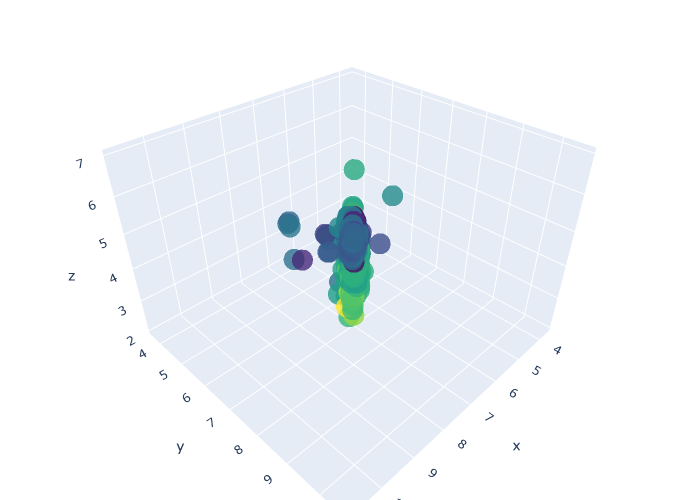

In [21]:
fig = go.Figure(data=[go.Scatter3d(
    x=df['x'],
    y=df['y'],
    z=df['z'],
    mode='markers',
    marker=dict(
        size=12,
        color=z,              
        colorscale='Viridis',  
        opacity=0.8
    )
)])

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show("svg")

In [ ]:
df.shape

(53907, 10)

In [19]:
srs_ten_percent = df.sample(n=math.floor((df.shape[0])*0.1))
srs_ten_percent.shape

(5390, 10)

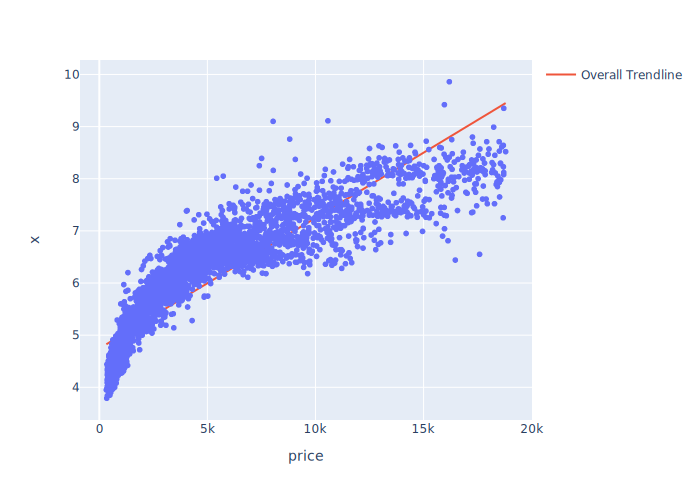

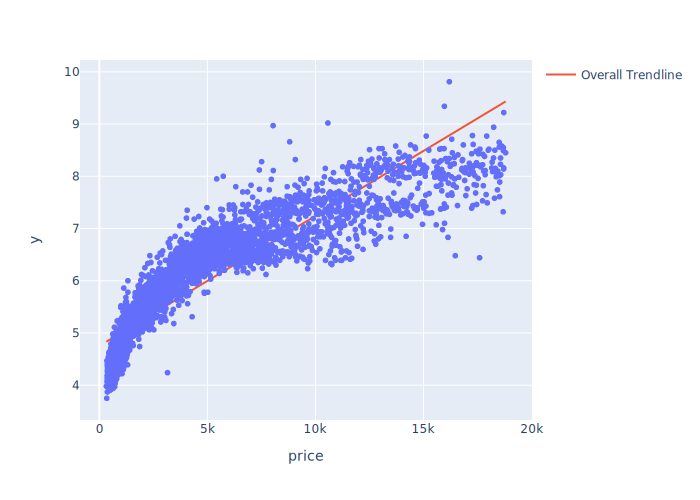

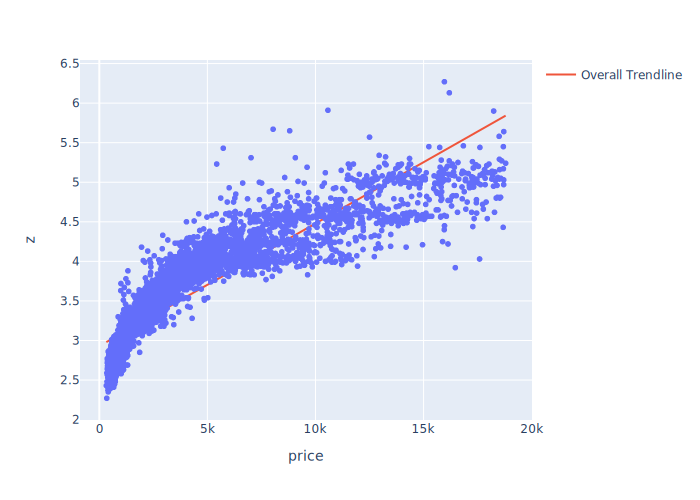

In [20]:
def plotscatterx():
    fig=px.scatter(srs_ten_percent, x="price", y="x", trendline="ols", trendline_scope="overall")
    fig.show(("svg"))

def plotscattery():
    fig=px.scatter(srs_ten_percent, x="price", y="y", trendline="ols", trendline_scope="overall")
    fig.show(("svg"))

def plotscatterz():
    fig=px.scatter(srs_ten_percent, x="price", y="z", trendline="ols", trendline_scope="overall")
    fig.show(("svg"))

plotscatterx()
plotscattery()
plotscatterz()

<h2> Data processing </h2>

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
from modules import data_processing

df = df.join(data_processing.automatize_one_hot_enc(df, "color", "color"))

In [ ]:
df = df.drop(["color"], axis = 1)

In [ ]:
df = df.join(data_processing.automatize_one_hot_enc(df, "clarity", "clarity"))
df = df.join(data_processing.automatize_one_hot_enc(df, "cut", "cut"))

In [ ]:
df = df.drop(["clarity", "cut"], axis = 1)

In [ ]:
df.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'color_0', 'color_1',
       'color_2', 'color_3', 'color_4', 'color_5', 'color_6', 'clarity_0',
       'clarity_1', 'clarity_2', 'clarity_3', 'clarity_4', 'clarity_5',
       'clarity_6', 'clarity_7', 'cut_0', 'cut_1', 'cut_2', 'cut_3', 'cut_4'],
      dtype='object')

In [ ]:
df

,carat,depth,table,price,x,y,z,color_0,color_1,color_2,...,clarity_3,clarity_4,clarity_5,clarity_6,clarity_7,cut_0,cut_1,cut_2,cut_3,cut_4
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,1,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,1,0,0,...,0,0,0,0,0,0,0,1,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,0,0,1,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,1,0,0,...,0,0,0,0,0,0,0,0,0,1
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
#checking for null values, already dropped x,y and z null values before
df.isnull().sum()

carat        0
depth        0
table        0
price        0
x            0
y            0
z            0
color_0      0
color_1      0
color_2      0
color_3      0
color_4      0
color_5      0
color_6      0
clarity_0    0
clarity_1    0
clarity_2    0
clarity_3    0
clarity_4    0
clarity_5    0
clarity_6    0
clarity_7    0
cut_0        0
cut_1        0
cut_2        0
cut_3        0
cut_4        0
dtype: int64

<h2> Regression </h2>

In [ ]:
df.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'color_0', 'color_1',
       'color_2', 'color_3', 'color_4', 'color_5', 'color_6', 'clarity_0',
       'clarity_1', 'clarity_2', 'clarity_3', 'clarity_4', 'clarity_5',
       'clarity_6', 'clarity_7', 'cut_0', 'cut_1', 'cut_2', 'cut_3', 'cut_4'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

x_for_test = df.drop(["price"], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x_for_test, df["price"], random_state=334441, test_size=0.25)

In [ ]:
classifiers = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor()
]
models = []

for classifier in classifiers:
    cfp = regression_modelling.classify_fit_predict(classifier, x_train, y_train, x_test)
    models.append(cfp)

Calculating predictions for LinearRegression
LinearRegression is ready... 
Calculation finished in 0:00:00.027901
Calculating predictions for DecisionTreeRegressor
DecisionTreeRegressor is ready... 
Calculation finished in 0:00:00.369511
Calculating predictions for RandomForestRegressor
RandomForestRegressor is ready... 
Calculation finished in 0:00:18.631790


In [ ]:
import sklearn.metrics as metrics

for i in range(len(models)):
    mae = metrics.mean_absolute_error(models[i][1], y_test)
    mse = metrics.mean_squared_error(models[i][1], y_test)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(models[i][1],y_test)

    print(f"{str(models[i][0])[:-2]} got scored at: {(models[i][0].score(x_test, y_test))*100:.2f}% ")
    print("Results of sklearn.metrics:")
    print("MAE:",mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-Squared:", r2)
    print("\n")

LinearRegression got scored at: 92.22% 
Results of sklearn.metrics:
MAE: 734.4262342390981
MSE: 1243442.4386445591
RMSE: 1115.0975018555816
R-Squared: 0.9145732656061222


DecisionTreeRegressor got scored at: 96.53% 
Results of sklearn.metrics:
MAE: 366.9185278622839
MSE: 555661.088335683
RMSE: 745.4267826793474
R-Squared: 0.9649750696705343


RandomForestRegressor got scored at: 98.17% 
Results of sklearn.metrics:
MAE: 276.07160267051097
MSE: 293256.3666406404
RMSE: 541.5315010603173
R-Squared: 0.9813118319993888


